In [22]:
import pandas as pd
import numpy as np

from dataProcessing import processing

path = f'../Data'
dfs = processing(path)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanAbsolutePercentageError
from sklearn.preprocessing import StandardScaler

In [24]:
model = Sequential([
    # LSTM layer
    LSTM(25, input_shape=(1, 17)),
    
    Dropout(0.2),

    Dense(4, activation='relu'),
    Dense(1, activation='linear')
])

optimizer = Adam(learning_rate=0.01)
loss = MeanAbsolutePercentageError()
model.compile(optimizer=optimizer, loss=loss)
model.summary()

C:\Users\suhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 25)             │         4,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,409 (17.22 KB)

 Trainable params: 4,409 (17.22 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
scaler = StandardScaler()

for year in range(2021, 2024):
    # Shift by 1 to predict the 'PTS' of the next game
    dfs[f'Data\\{year}']['PtsNextGame'] = dfs[f'Data\\{year}']['PTS'].shift(-1)
    
    X = dfs[f'Data\\{year}'].drop('PtsNextGame', axis=1)
    y = dfs[f'Data\\{year}']['PtsNextGame']
    
    # Remove NaN values due to the shift
    X = X.iloc[:-1]
    y = y.iloc[:-1]
    
    X = X.to_numpy()
    y = y.to_numpy()
    
    X = X.reshape((X.shape[0], X.shape[1]))  # X.shape[1] will give num_features
    y = y.reshape(y.shape[0], 1)

    # Normalize the features using StandardScaler
    X_normalized = scaler.fit_transform(X)

    # Dynamically define num_features from X_normalized
    num_features = X_normalized.shape[1]  # Number of features in the input data

    # Reshape X_normalized to 3D for LSTM: (samples, time_steps, features)
    X_normalized = X_normalized.reshape((X_normalized.shape[0], 1, num_features))  # Shape: (samples, time_steps, features)
    
    # Fit the model with the normalized data
    model.fit(X_normalized, y, epochs=70)


Epoch 1/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 100.1359
Epoch 2/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 99.2360 
Epoch 3/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 98.4026 
Epoch 4/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 97.5302 
Epoch 5/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 96.3404 
Epoch 6/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 94.7344 
Epoch 7/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 93.5342 
Epoch 8/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 91.7678 
Epoch 9/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 89.9617 
Epoch 10/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 87.5637 
Epoch 11/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 85.6626 
Epoch 12/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 82.7763 
Epoch 13/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 81.5609 
Epoch 14/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 77.5930 
Epoch 15/70
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 73.1427 
Epoch 16/70
3/3 ━━━

In [26]:
dfs[f'Data\\2024']['PtsNextGame'] = (dfs[f'Data\\2024'])['PTS'].shift(-1) # Shifting by 1.

X_test = dfs['Data\\2024'].drop('PtsNextGame', axis = 1)
X_test = X_test.iloc[:-1] # Removing NaN value formed by shift.
X_test = scaler.transform(X_test)

X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))  # Shape: (samples, time_steps, features)

y_test = dfs['Data\\2024']['PtsNextGame']
y_test = y_test.iloc[:-1] # Removing NaN value formed by shift.

predictions = model.predict(X_test)

C:\Users\suhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


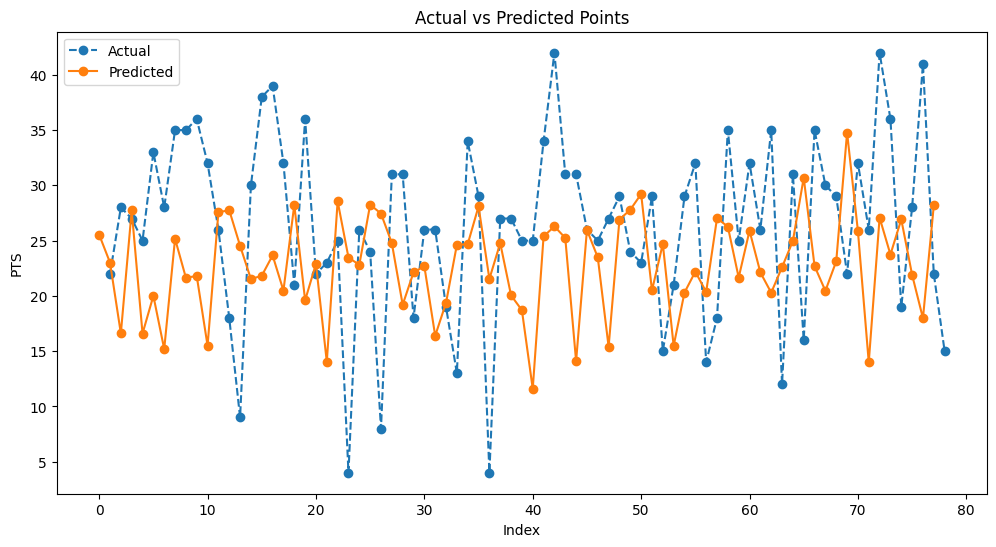

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linestyle='--', marker='o')
plt.plot(predictions, label='Predicted', linestyle='-', marker='o')
plt.xlabel('Index')
plt.ylabel('PTS')
plt.title('Actual vs Predicted Points')
plt.legend()
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50.1062  
46.8525276184082


<Axes: >

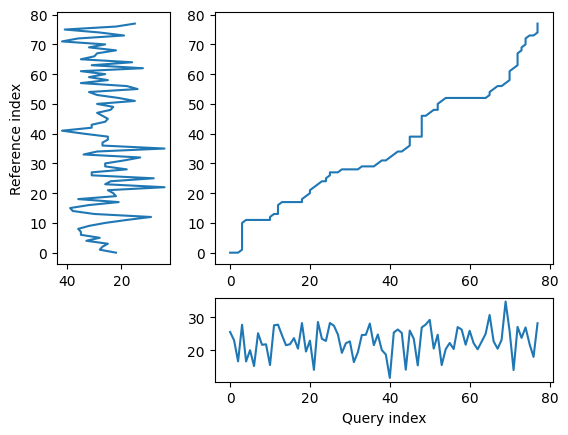

In [28]:
print(model.evaluate(X_test, y_test))

from dtw import *

query = predictions
template = y_test.to_numpy()

alignment = dtw(query, template, keep_internals=True)
alignment.plot(type="threeway")